<a href="https://colab.research.google.com/github/malaaaky/Google-PlayStore-EDA-Rating-Predection/blob/main/Google_PlayStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***References:***

[Google PlayStore Dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps/data)


[EDA Questions](https://www.kaggle.com/code/ahmedsaleh17/strategic-analysis-of-the-google-play-store-market#Exploratory-Data-Analysis-To-Answer-Client-Questions)

In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Step 1 | Data Overview

In [464]:
df=pd.read_csv('/content/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [466]:
def column_info(df):
  cols=[]
  dtypes=[]
  unique_values=[]
  nunique_values=[]

#loop ala kol columns
  for col in df.columns:
    cols.append(col)
    dtypes.append(df[col].dtype)
    unique_values.append(df[col].unique())
    nunique_values.append(df[col].nunique())

#return dataframe fe dictionnaries
  return pd.DataFrame({'column_name':cols,
                        'data_type':dtypes,
                        'unique_values':unique_values,
                        'nunique_values':nunique_values})

In [467]:
column_info(df)

,column_name,data_type,unique_values,nunique_values
0,App,object,[Photo Editor & Candy Camera & Grid & ScrapBoo...,9660
1,Category,object,"[ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO...",34
2,Rating,float64,"[4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, ...",40
3,Reviews,object,"[159, 967, 87510, 215644, 167, 178, 36815, 137...",6002
4,Size,object,"[19M, 14M, 8.7M, 25M, 2.8M, 5.6M, 29M, 33M, 3....",462
5,Installs,object,"[10,000+, 500,000+, 5,000,000+, 50,000,000+, 1...",22
6,Type,object,"[Free, Paid, nan, 0]",3
7,Price,object,"[0, $4.99, $3.99, $6.99, $1.49, $2.99, $7.99, ...",93
8,Content Rating,object,"[Everyone, Teen, Everyone 10+, Mature 17+, Adu...",6
9,Genres,object,"[Art & Design, Art & Design;Pretend Play, Art ...",120


#Step 2 | DataType Conversions

***Convert to numeric:***

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Price : The price of the app (0 if it is Free)

***Convert to date-time:***

Last Updated : The date when the app was last updated

##2.1 Reviews

In [468]:
#display all values
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [469]:
#find which row contain 3.0M and drop it
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Data entry contains many errors, **SHIFTED**

Category=1.9
review=30.M
rating=19
etc...

In [470]:
df.drop(10472,inplace=True)

In [471]:
#error:invalid literal for int() with base 10: '3.0M'
df['Reviews'] = df['Reviews'].astype(int)

In [472]:
df['Reviews'].dtype

dtype('int64')

##2.2 Size

In [473]:
df['Size'].unique()
#varies with device

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

- If you notice, the size column contains values like 38M, 7.4M, and 525k.

- Some application sizes are in megabytes, while others are in kilobytes.

- There is a value Varies with device we need to replace it with

In [474]:
def Size_Conversion(size):
    """
    This function will clean every value in Size feature and then convert it as float
    and if the value in kilobytes we will convert it to Megabyte
    """
    try:

      # check if the value ends with "M", convert to float and remove the M
      if size.endswith("M"):
          return float(size[:-1])
      # check if the value ends with "k" and then convert it to Megabytes
      elif size.endswith("k"):
          return float(size[:-1]) / 1024
      # check Varies with device and make it 0
      # elif size == "Varies with device":
      #     return 0
      # anything else return nan value , better replace varies with device with null then randomly imputate it than replacing it with 0
      else:
          return np.nan

    except:
        return np.nan


In [475]:
df["Size"] = df["Size"].apply(Size_Conversion)
df["Size"]

,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8
...,...
10836,53.0
10837,3.6
10838,9.5
10839,NaN


##2.3 Install & Price

In [476]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [477]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [478]:
#remove , + $
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col]=df[col].str.replace(item,'')

In [479]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [480]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [481]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


##2.4 Last Updated

In [482]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [483]:
df['Last Updated']= pd.to_datetime(df['Last Updated'])
df['Last Updated']

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20
...,...
10836,2017-07-25
10837,2018-07-06
10838,2017-01-20
10839,2015-01-19


In [484]:
df['Month']=df['Last Updated'].dt.month
df['Year']=df['Last Updated'].dt.year
df.drop('Last Updated',inplace=True,axis=1)

In [485]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


#Step 3 | Data cleaning

##3.1 Null Values

In [486]:
import missingno as msno

In [487]:
nulls = df.isnull().sum()

In [488]:
null = pd.DataFrame({'Null Values' : df.isnull().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


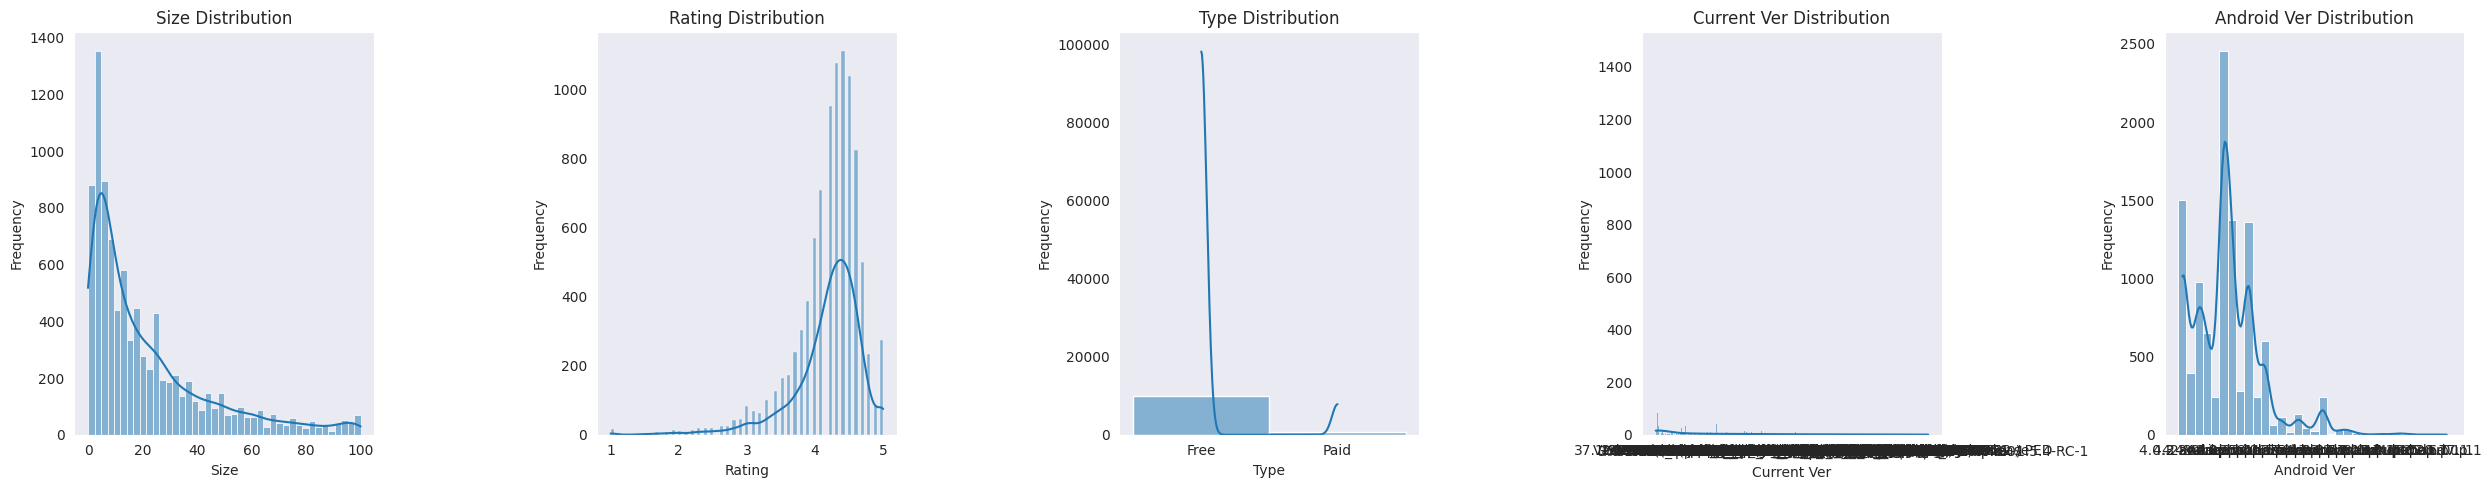

In [489]:
#draw 5 fig : size,rating , type , current ver, android ver distribution with sns
# Create a list of features to plot
features = ['Size', 'Rating', 'Type', 'Current Ver', 'Android Ver']

# Create a figure with 5 subplots in a single row
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# Iterate over the features and axes to create the plots
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=axes[i], kde=True)  # Use kde=True for a kernel density estimate
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

***Numerical Imputations***

In [490]:
#impute size nulls with random
size_fill_list = df['Size'].dropna()
df['Size'] = df['Size'].fillna(pd.Series(np.random.choice(size_fill_list , len(df.index))))

#impute rating with random
Rating_fill_list = df['Rating'].dropna()
df['Rating'] = df['Rating'].fillna(pd.Series(np.random.choice(Rating_fill_list ,len(df.index))))

***Categorical Imputations***

In [491]:
#replace current ver ,android ver , type with mode
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)
df['Type'].fillna(df['Type'].mode()[0],inplace=True)

In [492]:
# from sklearn.impute import KNNImputer
# # KNN Imputation
# knn_imputer = KNNImputer()

# df[["Rating"]] = knn_imputer.fit_transform(df[["Rating"]])
# df[["Size"]] = knn_imputer.fit_transform(df[["Size"]])

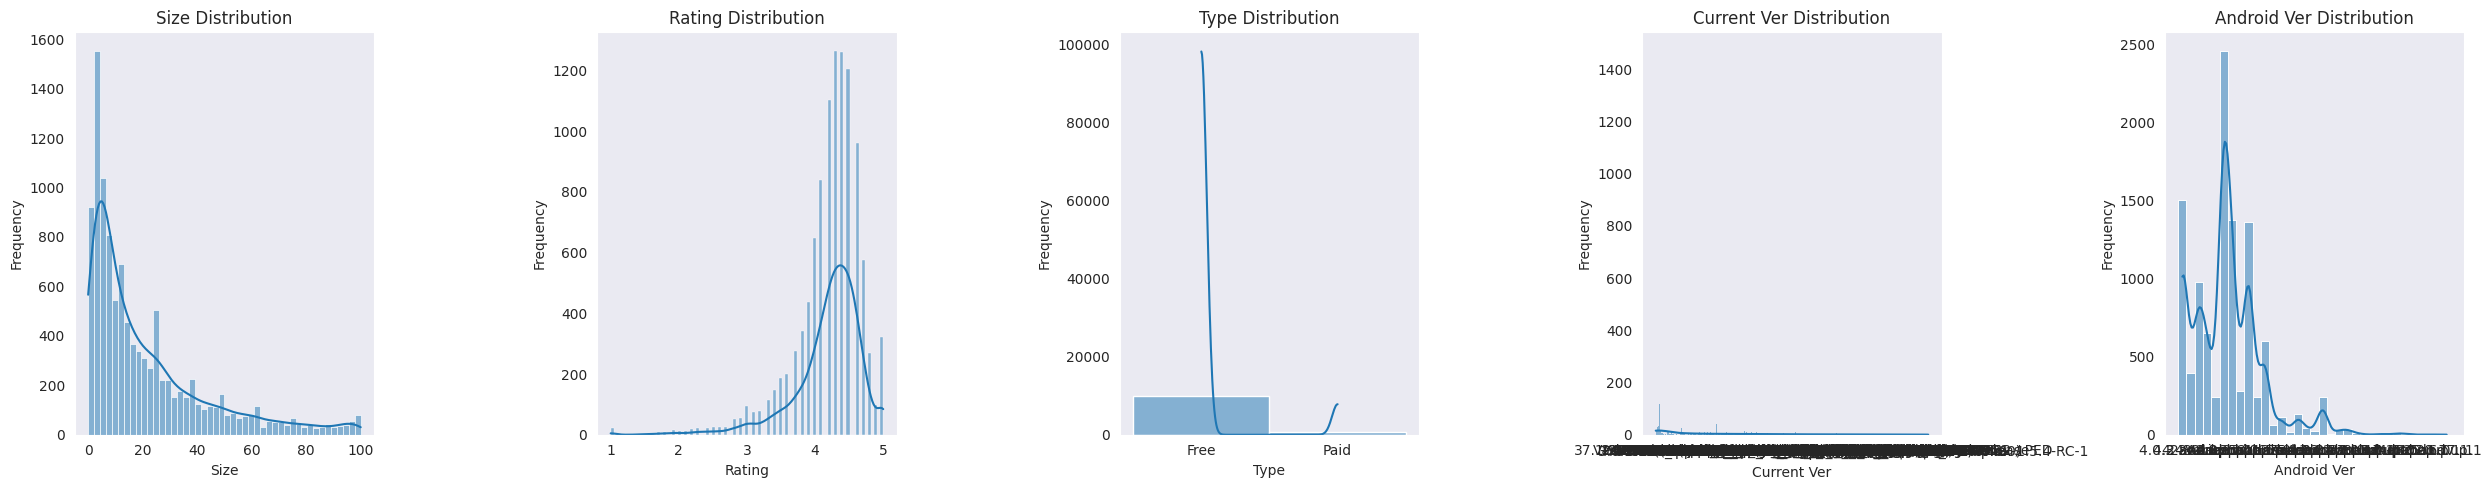

In [493]:
# Create a list of features to plot
features = ['Size', 'Rating', 'Type', 'Current Ver', 'Android Ver']

# Create a figure with 5 subplots in a single row
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# Iterate over the features and axes to create the plots
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=axes[i], kde=True)  # Use kde=True for a kernel density estimate
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##3.2 Duplicates

In [494]:
df.duplicated().sum()

308

In [495]:
df.drop_duplicates(inplace=True)

##3.3 Unbalance

In [496]:
#list all numerical columns and the catgorical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(f'numerical_columns:' ,numerical_columns)
print(f'categorical_columns:',categorical_columns)

numerical_columns: Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Month', 'Year'], dtype='object')
categorical_columns: Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [497]:
df['Rating'].describe()

,Rating
count,10532.000000
mean,4.191075
std,0.520144
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


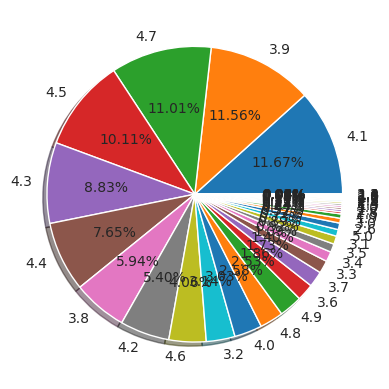

In [498]:
plt.pie(x=df['Rating'].value_counts(), labels=df['Rating'].unique(),shadow=True, autopct='%1.2f%%')
plt.show()

#Step 4 | EDA

**Key Business Questions Addressed**

##4.1 Pricing Strategy
1. What is the most expensive app on the store?

    **Business Insight:** Identifying the highest-priced apps helps in understanding the upper pricing threshold. This can guide premium app developers on pricing strategies.

2. What is the average price of apps for each genre with different install numbers?

    **Business Insight:** Understanding how pricing varies by genre and install count helps in setting competitive prices. For example, niche genres with high install numbers might allow for higher pricing due to their perceived value.
3. How many apps have a rating > 4.7, and what is their average price?

    **Business Insight:** High-rated apps command higher trust and can potentially be priced higher. This insight helps in positioning premium, high-quality apps.

In [499]:
#What is the most expensive app on the store
df.sort_values(by='Price',ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Year
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,1.0.1,4.1 and up,5,2018
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,1.54,1.6 and up,5,2017
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7,1000,Paid,399.99,Teen,Finance,2,4.0.3 and up,12,2017
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41.0,1000,Paid,399.99,Everyone,Finance,1.0.2,4.1 and up,6,2018
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,2.0,4.0.3 and up,1,2018


In [499]:
#What is the average price of apps for each genre with different install numbers

In [499]:
#How many apps have a rating > 4.7, and what is their average price

##4.2 Market Segmentation
1. Which Genre has more apps?

    Business Insight: Knowing the most crowded genres allows developers to identify saturated markets and potential areas for differentiation or untapped niches.
2. How many apps are available for each content rating?

    Business Insight: Content rating distribution helps businesses tailor their apps to the appropriate audience, ensuring compliance and maximizing reach within target demographics.
3. How many apps work on Android version 4?

    Business Insight: Understanding app compatibility with older Android versions helps businesses decide whether to support legacy systems or focus on newer OS versions.
4. Which Genre has more apps?

    Business Insight: Knowing the most crowded genres allows developers to identify saturated markets and potential areas for differentiation or untapped niches

In [499]:
#Which Genre has more apps

In [ ]:
#How many apps are available for each content rating

In [ ]:
#How many apps work on Android version 4

In [ ]:
#Which Genre has more apps

##4.3 User Engagement & App Performance
1. How many apps have more than 50K reviews?

    Business Insight: Apps with high review counts are indicators of strong user engagement. These apps can be studied to understand what drives user interaction and satisfaction.
2. Is there a correlation between rating, reviews, size, and the price of the app?

    Business Insight: Correlation analysis helps identify which factors most influence app pricing and user perception, guiding developers on which aspects to prioritize.
3. How much did Google earn from apps with over 5,000,000 installs?

    Business Insight: Estimating Google's earnings from highly installed apps provides insight into the revenue potential for top-performing apps

In [499]:
#How many apps have more than 50K reviews

In [ ]:
#Is there a correlation between rating, reviews, size, and the price of the app

In [ ]:
#How much did Google earn from apps with over 5,000,000 installs

##4.4 Product Development
1. What is the average size of free vs. paid apps?

    Business Insight: Understanding size differences between free and paid apps can guide decisions on feature sets and optimization, balancing functionality with user download convenience.
2. What are the max and min sizes for free and paid apps?

    Business Insight: Identifying the size range for apps helps in setting benchmarks for app development, ensuring apps are competitive in terms of download size.
3. What are the top 5 most expensive apps with a 5-star rating?

    Business Insight: These apps serve as case studies for premium pricing and top-notch quality, offering lessons on what drives high user satisfaction in paid apps.

In [ ]:
#What is the average size of free vs. paid apps

In [ ]:
#What are the max and min sizes for free and paid apps

In [ ]:
#What are the top 5 most expensive apps with a 5-star rating

#Step 5 | Encoding

In [500]:
#categorical_columns:(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver','Android Ver']
column_info(df)

,column_name,data_type,unique_values,nunique_values
0,App,object,[Photo Editor & Candy Camera & Grid & ScrapBoo...,9659
1,Category,object,"[ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BO...",33
2,Rating,float64,"[4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, ...",39
3,Reviews,int64,"[159, 967, 87510, 215644, 167, 178, 36815, 137...",6001
4,Size,float64,"[19.0, 14.0, 8.7, 25.0, 2.8, 5.6, 29.0, 33.0, ...",459
5,Installs,int64,"[10000, 500000, 5000000, 50000000, 100000, 500...",20
6,Type,object,"[Free, Paid]",2
7,Price,float64,"[0.0, 4.99, 3.99, 6.99, 1.49, 2.99, 7.99, 5.99...",92
8,Content Rating,object,"[Everyone, Teen, Everyone 10+, Mature 17+, Adu...",6
9,Genres,object,"[Art & Design, Art & Design;Pretend Play, Art ...",119


In [501]:
#remove due insignificance
df=df.drop(['App','Current Ver'], axis=1)

In [502]:
#label encoder type & Content Rating (due being ordinal data)
#'App', 'Category','Genres', 'Current Ver','Android Ver'
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
catCols =  ['Category','Genres','Android Ver','Type','Content Rating']
for cols in catCols:
    df[cols] = le.fit_transform(df[cols])

df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Month,Year
0,0,4.1,159,19.0,10000,0,0.0,1,9,15,1,2018
1,0,3.9,967,14.0,500000,0,0.0,1,12,15,1,2018
2,0,4.7,87510,8.7,5000000,0,0.0,1,9,15,8,2018
3,0,4.5,215644,25.0,50000000,0,0.0,4,9,18,6,2018
4,0,4.3,967,2.8,100000,0,0.0,1,11,20,6,2018


**Note:**

one hot encoder will produce 126800 columns. Must be handled with PCA (dimensionality reduction)

In [503]:
#one hot encoder for 'App', 'Category','Genres', 'Current Ver','Android Ver'
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False for a dense array
# encoded_data = encoder.fit_transform(df[['App', 'Category', 'Genres', 'Current Ver','Android Ver']])
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['App', 'Category', 'Genres', 'Current Ver','Android Ver']))
# df_encoded = pd.concat([df, encoded_df], axis=1)
# df_encoded.drop(['App', 'Category', 'Genres', 'Current Ver','Android Ver'], axis=1, inplace=True)

# df_encoded.head()

#Step 6 | Split Data

In [504]:
target = 'Rating'
x=df.drop(target,axis=1)
y=df[target]

In [505]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=22)

#Step 7 | Outliers

In [506]:
# Concatenate along columns (axis=1)
df_train = pd.concat([x_train, y_train], axis=1)
df_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Month,Year,Rating
141,3,4478,9.5,100000,0,0.00,2,19,13,7,2017,4.6
9605,14,1489,67.0,100000,0,0.00,4,0,17,5,2018,4.3
2258,20,206,9.5,10000,1,2.99,1,71,13,4,2018,3.8
7427,6,5,13.0,100,0,0.00,1,36,17,10,2017,1.0
1896,14,506593,49.0,10000000,0,0.00,1,6,17,8,2018,4.6


###Price analysis
removed the price feature from the list of capping outliers , 3ashan 767 column wa keda khala kolo 0. ehna ayzeen yeba fe 2 types msh kolo free.

In [507]:
df['Price'].value_counts()

,count
Price,
0.00,9764
0.99,146
2.99,126
1.99,73
4.99,70
...,...
389.99,1
19.90,1
1.75,1


In [508]:
#percentage of price
print('Free apps are {}% of the total apps in the dataset'.format(np.round(len(df[df['Price']==0])*100/len(df)),2))

Free apps are 93.0% of the total apps in the dataset


In [509]:
#check the sum of rows with price bigger than 0
df[df['Price']>0]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,Month,Year
234,4,4.7,11442,6.800000,100000,1,4.99,1,22,13,3,2018
235,4,4.8,10295,39.000000,100000,1,4.99,1,22,10,4,2017
427,6,4.0,18247,5.100000,100000,1,3.99,1,36,17,7,2018
476,7,4.2,1545,67.000000,10000,1,3.99,3,38,17,6,2018
477,7,2.6,57,6.200000,1000,1,6.99,1,38,13,10,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
10735,11,4.0,17,0.153320,100,1,0.99,3,52,5,11,2015
10760,15,4.4,35,2.400000,1000,1,7.99,1,62,18,8,2018
10782,14,3.8,252,11.000000,10000,1,16.99,4,0,25,2,2015
10785,11,4.2,1405,9.500000,10000,1,1.20,1,83,8,6,2018


###outliers capping

In [510]:
#get numerical columns
features= ['Rating', 'Reviews', 'Size', 'Installs']

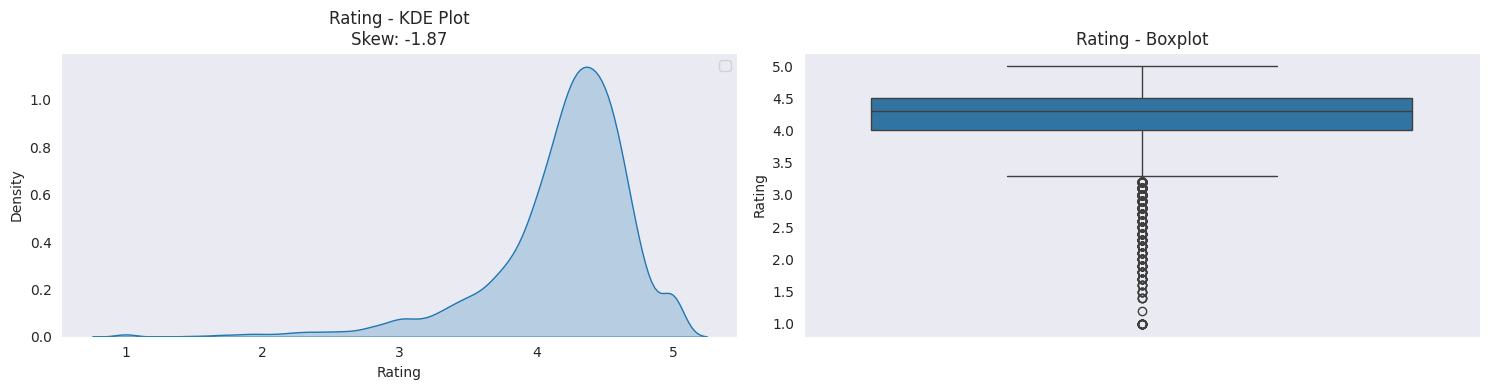

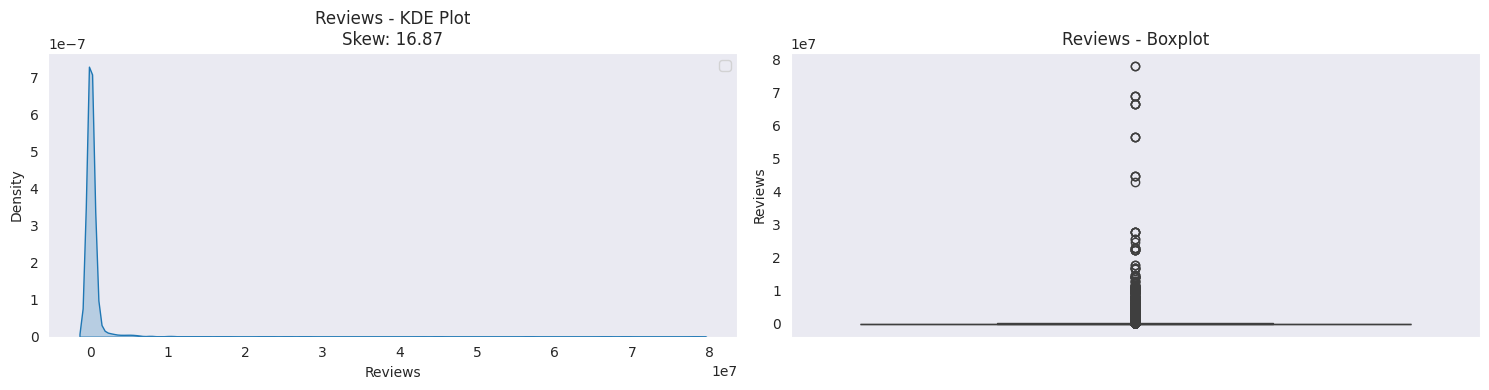

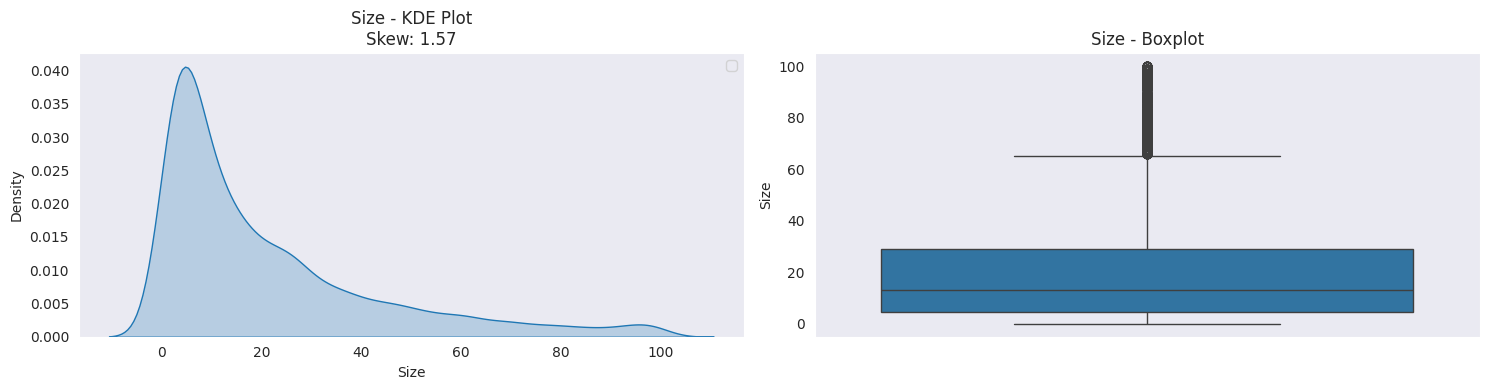

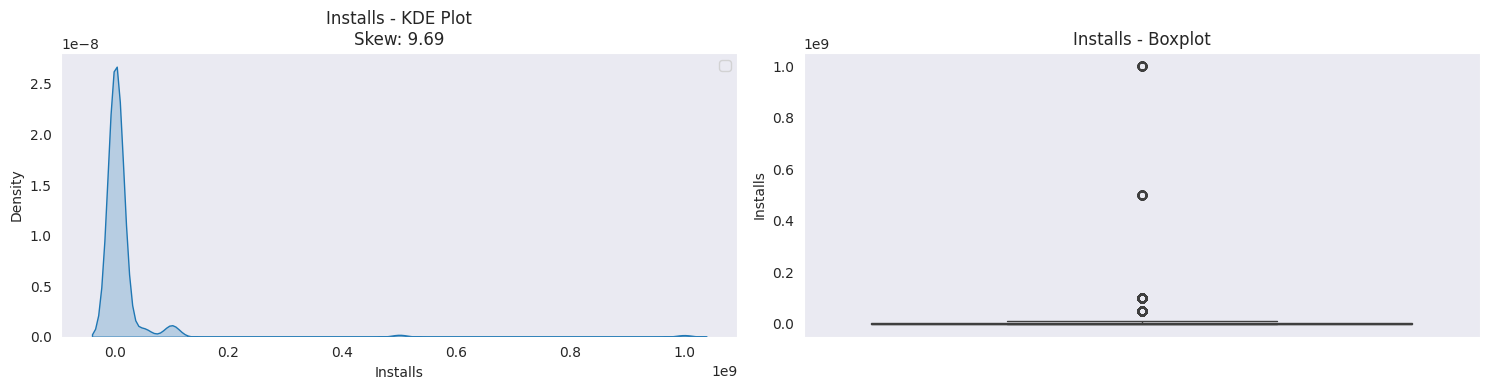

In [511]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))

    # KDE plot
    plt.subplot(1, 2, 1)
    sns.kdeplot(df[col], shade=True)
    plt.title(f"{col} - KDE Plot\nSkew: {np.round(df[col].skew(), 2)}")
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()


In [512]:
def iqr_capping(df, cols, factor):

    for col in cols:

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [513]:
iqr_capping(df_train, features, 1.5)

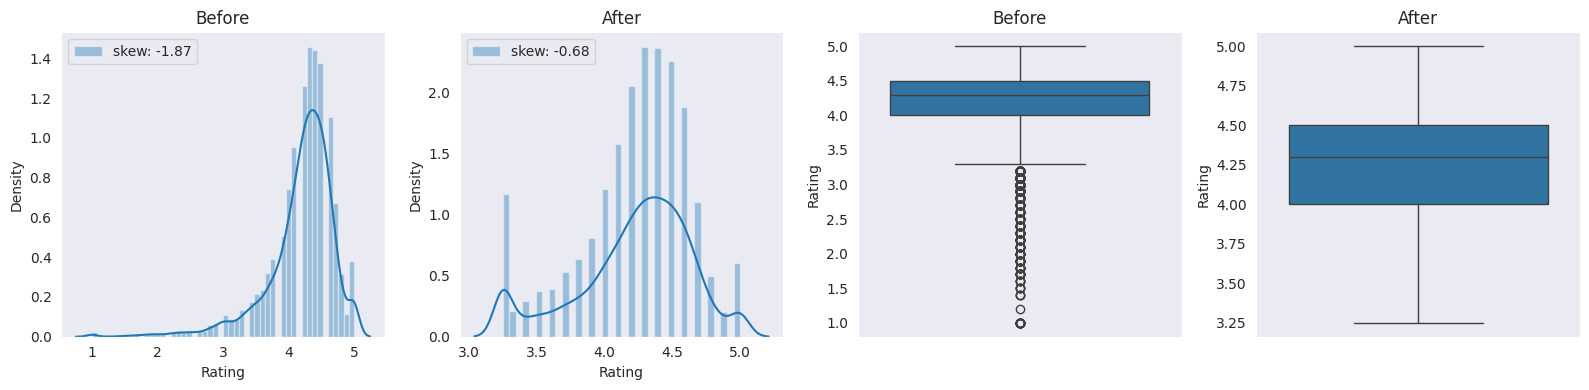

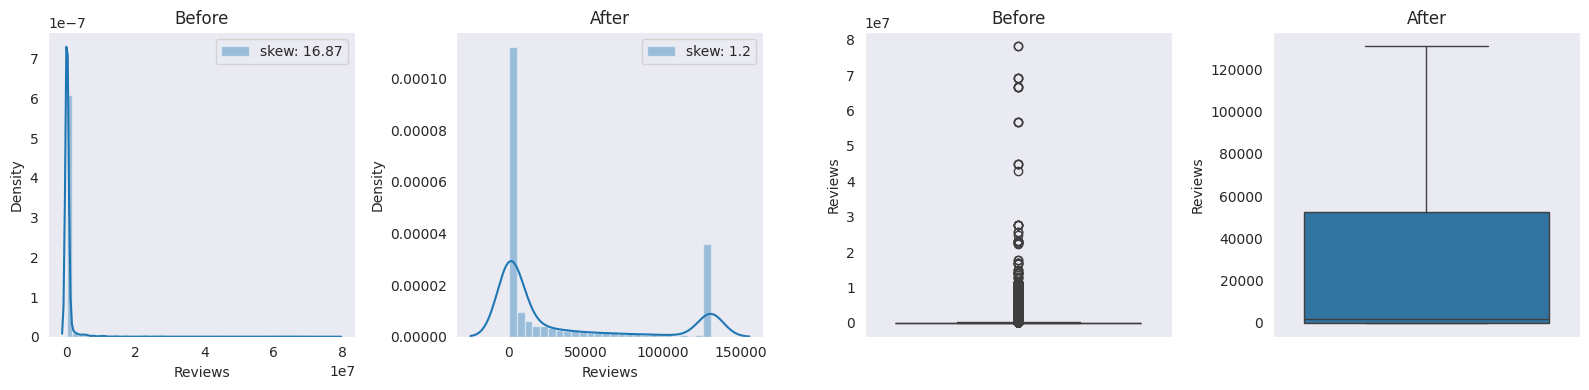

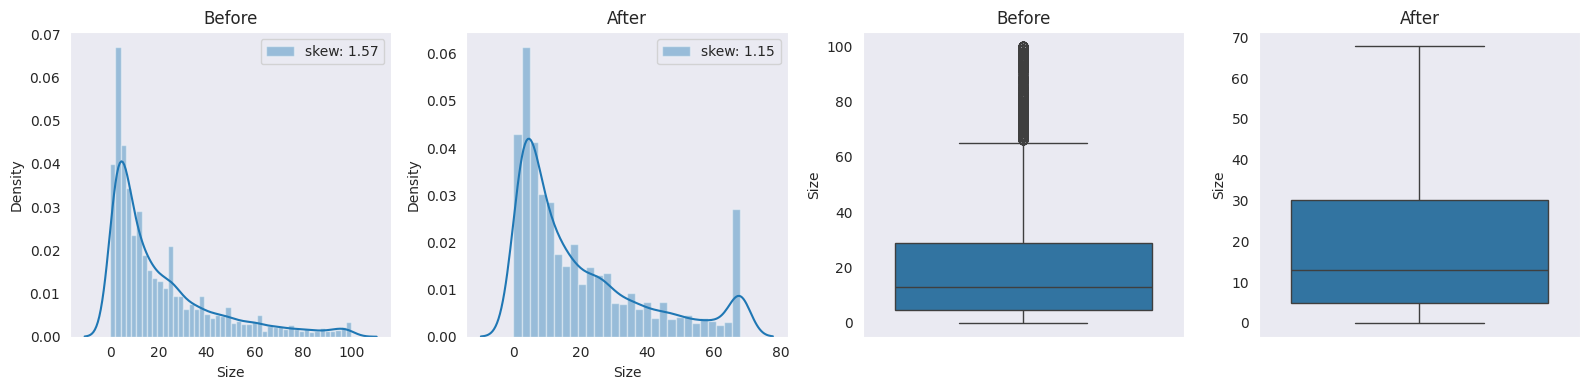

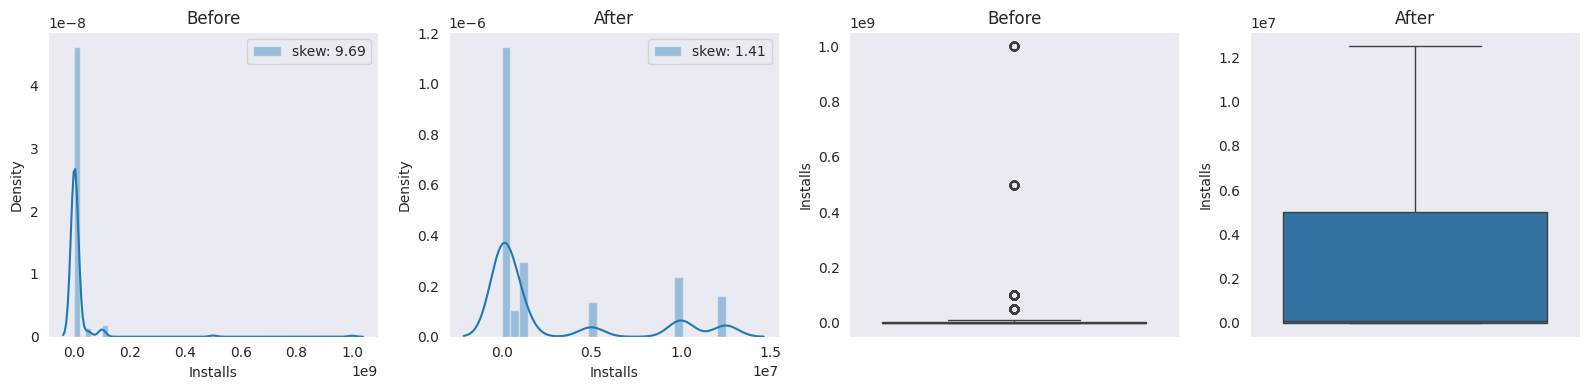

In [514]:
for col in features:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(df_train[col], label="skew: " + str(np.round(df_train[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(df_train[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

#Step 8 | Scaling

In [515]:
from sklearn.preprocessing import StandardScaler  # to standardize the features

In [516]:
#Standardize the features
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

# Step 9 | Check linearity

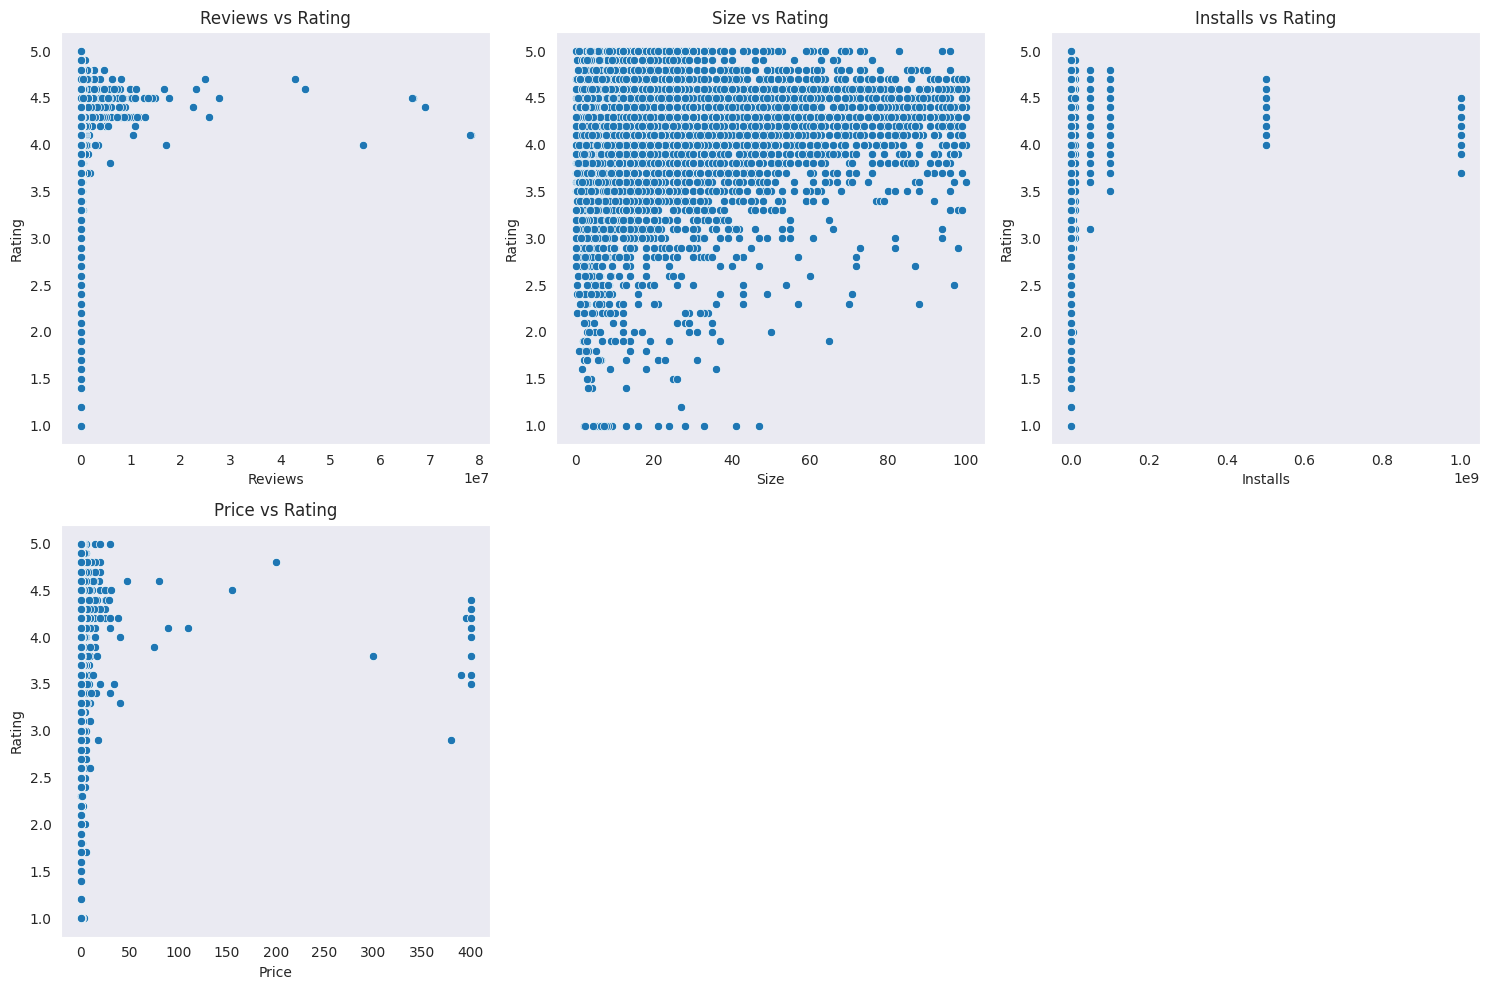

In [517]:
# Define the features to plot
features = ['Reviews', 'Size', 'Installs', 'Price']

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='Rating', ax=axes[i])
    axes[i].set_title(f'{feature} vs Rating')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Rating')

# Hide any unused subplots (in case there are fewer than 6 features)
for j in range(len(features), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


#Step 10 | Models

##Classification

In [530]:
# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [526]:
#Let's frame it as a classification problem statement. Converting the Rating from continuous to discrete
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

***METRICS DATAFRAME ***

In [527]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index, columns=['accuracy %'])
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN

###Logistic Regression

In [531]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type (ElasticNet requires 'saga' solver)
    'solver': ['liblinear', 'saga'],      # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300]           # Maximum number of iterations taken for the solvers to converge
}

# Initialize the LogisticRegression model
model = LogisticRegression(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',     # Use accuracy as the evaluation metric
    cv=5,                   # 5-fold cross-validation
)

# Fit the GridSearchCV on the training data
grid_search.fit(x_train, y_train_int)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model and its accuracy on the training data
best_model = grid_search.best_estimator_
print("Best Model's Accuracy on Training Set:", grid_search.best_score_)


Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model's Accuracy on Training Set: 0.7560830860534125


In [539]:
LRmodel = LogisticRegression( C= 0.01, max_iter= 100, penalty='l1', solver= 'liblinear')
LRmodel.fit(x_train, y_train_int)

# Evaluate the model
y_pred_LR = LRmodel.predict(x_test)
accuracy = accuracy_score(y_test_int, y_pred_LR)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 75.70%


In [540]:
df_metrics_clf.loc['Logistic Regression', 'train'] = LRmodel.score(x_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = LRmodel.score(x_test, y_test_int)

###Random Forest Classifier

In [535]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [10, 20, 30, None],       # Maximum depth of the tree
    'max_features': ['sqrt', 'log2', None],# Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']       # Function to measure the quality of a split
}

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',       # Use accuracy as the evaluation metric
    cv=5,                     # 5-fold cross-validation
)

# Fit the GridSearchCV on the training data
grid_search.fit(x_train, y_train_int)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model and its accuracy on the training data
best_model = grid_search.best_estimator_
print("Best Model's Accuracy on Training Set:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
Best Model's Accuracy on Training Set: 0.7626112759643917


In [537]:
RFmodel = RandomForestClassifier(criterion= 'gini', max_depth= 20, max_features= 'sqrt', n_estimators= 300 )
RFmodel.fit(x_train, y_train_int)

# Evaluate the model
y_pred_RF = RFmodel.predict(x_test)
accuracy = accuracy_score(y_test_int, y_pred_RF)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 75.79%


In [541]:
df_metrics_clf.loc['Random Forest', 'train'] = RFmodel.score(x_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = RFmodel.score(x_test, y_test_int)

###KNN Classifier

In [548]:
# Define the parameter grid
param_distributions = {
    'n_neighbors': np.arange(3, 21, 2),  # Range of odd numbers from 3 to 19
    'weights': ['uniform', 'distance'],     # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}

# Initialize the KNeighborsClassifier model
model = KNeighborsClassifier()

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,               # Number of parameter settings sampled
    scoring='accuracy',      # Use accuracy as the evaluation metric
    cv=5,                    # 5-fold cross-validation
    random_state=42          # For reproducibility
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(x_train, y_train_int)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Get the best model and its accuracy on the training data
best_model = random_search.best_estimator_
print("Best Model's Accuracy on Training Set:", random_search.best_score_)


Best Parameters: {'weights': 'uniform', 'n_neighbors': 19, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
Best Model's Accuracy on Training Set: 0.7524035608308606


In [550]:
KNNmodel = KNeighborsClassifier( weights= 'uniform', n_neighbors= 19, metric= 'manhattan', algorithm= 'kd_tree')
KNNmodel.fit(x_train, y_train_int)

# Evaluate the model
y_pred_KNN = KNNmodel.predict(x_test)
accuracy = accuracy_score(y_test_int, y_pred_KNN)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 75.13%


In [553]:
df_metrics_clf.loc['KNN', 'train'] = KNNmodel.score(x_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = KNNmodel.score(x_test, y_test_int)

##Regression

In [543]:
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

***CREATING DATAFRAME FOR METRICS***

In [519]:
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

###Linear Regression

###Random Forest Regression

Note:

- In scikit-learn, many model evaluation and hyperparameter tuning functions (like GridSearchCV) require a metric where higher values indicate better performance. Since MSE is naturally a positive value and lower values are better, it is negated to fit this requirement.
- By negating the MSE, scikit-learn can treat it as a "score" that should be maximized, rather than minimized.

In [524]:
# Define the parameter grid
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider at every split
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

#Random Search for less time
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,  # Same grid, but only samples from it
    n_iter=100,                      # Number of combinations to try
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [544]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [545]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(x_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(x_test, y_test)

In [546]:
df_metrics_reg

value
model         dataset metric          
Linear        train   RMSE         NaN
                      MAE          NaN
                      R2           NaN
              test    RMSE         NaN
                      MAE          NaN
                      R2           NaN
KNN           train   RMSE         NaN
                      MAE          NaN
                      R2           NaN
              test    RMSE         NaN
                      MAE          NaN
                      R2           NaN
Random Forest train   RMSE    0.507772
                      MAE     0.353345
                      R2      0.062503
              test    RMSE    0.486796
                      MAE     0.342153
                      R2      0.061166

In [547]:
#mean and std of the target variable
print('The mean of the target variable is:', df['Rating'].mean())
print('The standard deviation of the target variable is:', df['Rating'].std())


The mean of the target variable is: 4.191074819597417
The standard deviation of the target variable is: 0.5201441179442268


###KNN Regression

#Steps 11 | Evaluation

##Evaluate Classification

In [554]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train     0.755964
                    test         0.757
KNN                 train     0.760356
                    test      0.751305
Random Forest       train      0.99276
                    test       0.75795

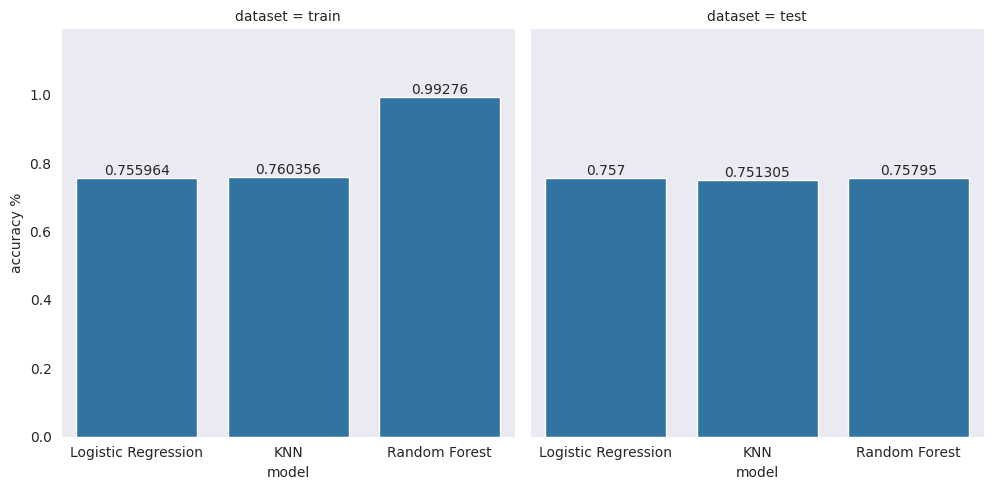

In [555]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()